In [2]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
from pandas.api.types import CategoricalDtype

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

In [11]:
df = pd.read_csv(filepath_or_buffer='../data/processed/performance_testing/original/login.csv', delimiter=',', header=0, index_col=0)
df.head()

,score,first-contentful-paint,largest-contentful-paint,total-blocking-time,cumulative-layout-shift,speed-index
id,,,,,,
1,0.55,10134.778525,17317.85875,33.5,0,12745.1105
2,0.55,9992.625000,17091.37500,37.0,0,12081.4540
3,0.55,10094.199100,17292.03610,45.5,0,12563.5076
4,0.55,10045.097550,17218.04820,32.5,0,12104.7880
5,0.55,9976.889200,17097.35960,30.0,0,12004.1370


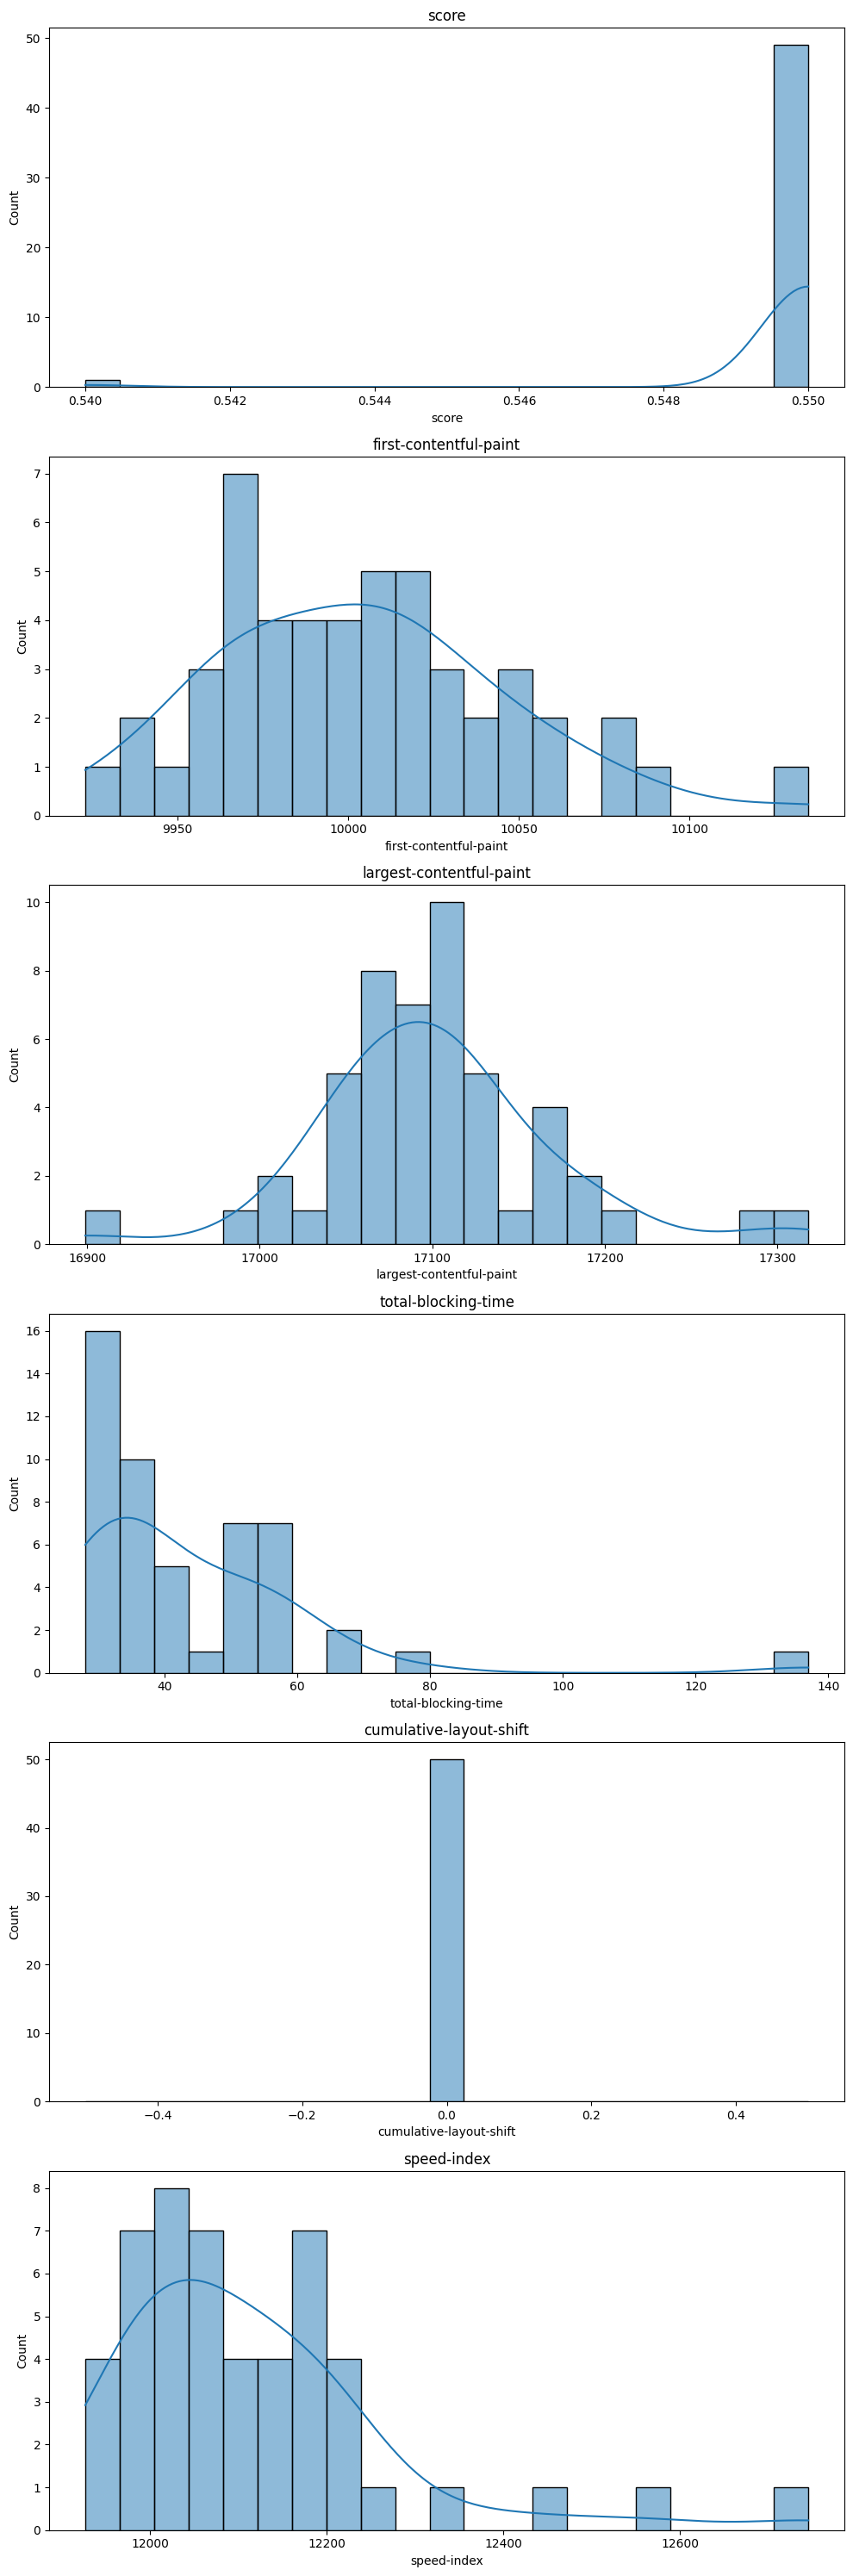

In [12]:
figure, axes = plt.subplots(len(df.columns), 1, figsize=(10, 5*len(df.columns)))

for ax, column in zip(axes, df.columns):
    sns.histplot(data=df, x=column, bins=21, kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()


In [13]:
df = pd.read_csv(filepath_or_buffer='./data/processed/performance_testing/cybersecurity/login.csv', delimiter=',', header=0, index_col=0)
df.head()

,score,first-contentful-paint,largest-contentful-paint,total-blocking-time,cumulative-layout-shift,speed-index
id,,,,,,
1,0.55,17645.214475,29207.121800,73.0,0.000145,22853.467865
2,0.55,16821.056400,28228.618600,64.5,0.000145,20777.159129
3,0.55,16885.535450,28276.212875,66.0,0.000145,20850.009055
4,0.55,16816.941175,28174.433250,39.0,0.000145,20611.924318
5,0.55,16866.755400,28363.882800,34.0,0.000145,20650.734500


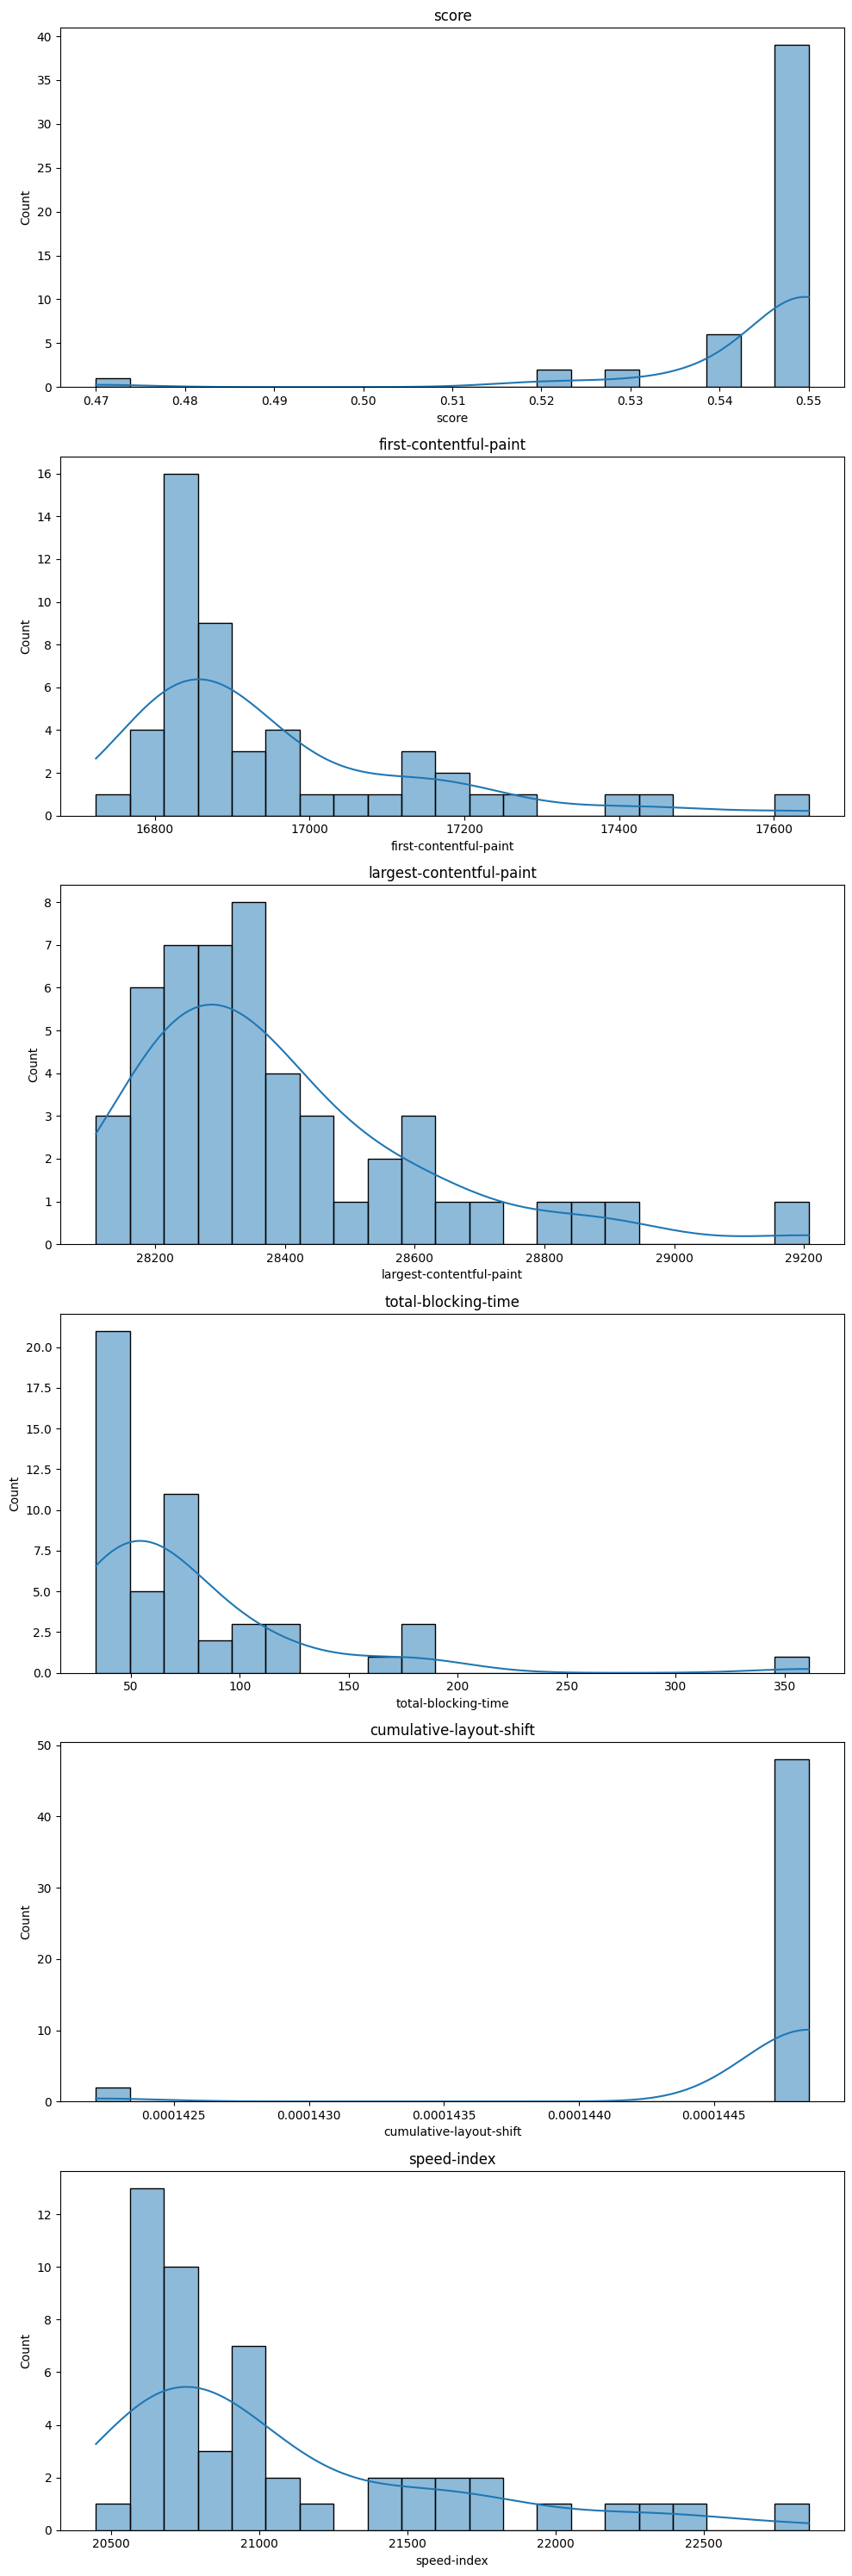

In [14]:
figure, axes = plt.subplots(len(df.columns), 1, figsize=(10, 5*len(df.columns)))

for ax, column in zip(axes, df.columns):
    sns.histplot(data=df, x=column, bins=21, kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()
